106.30015960000001 17.88039977
the center of the solenoid is at Z = 63.48359819854865 m
There we have: (-5.716228256586956 +- 0.024601213424385284) mT


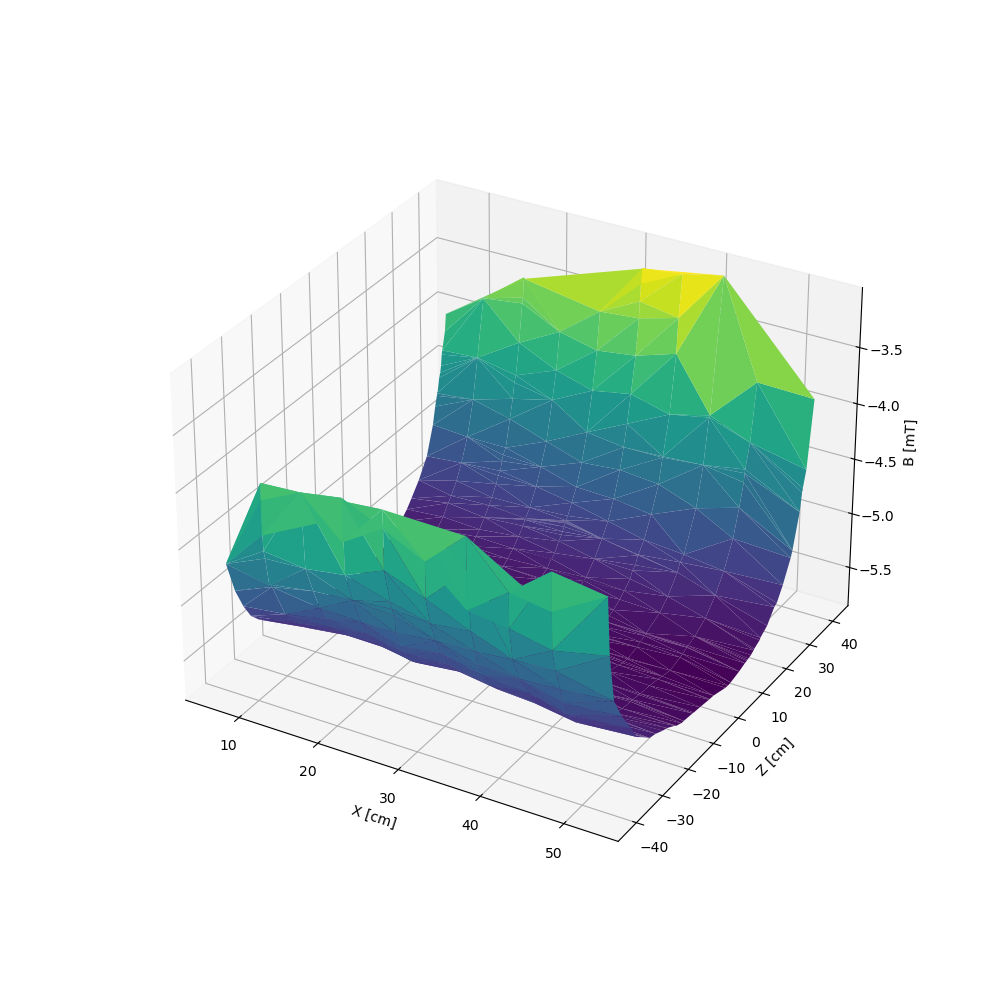

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget 
#import values
filename="data/layer_mid_B.txt"

with open(filename, 'r') as file:
    lines = [line.strip() for line in file if not line.startswith('#')]
# Initialize empty lists for each column
X = []
Z = []
B = []

# Iterate through each line and split the values
for line in lines:
    # Split the line into three values using space as the delimiter
    values = line.split()
    
    # Convert each value to the appropriate data type (e.g., float)
    val1, _,_,val2, val3 = map(float, values)
    
    # Append the values to the respective columns
    X.append(val1)
    Z.append(val3)
    B.append(val2)

X = np.array(X)
B = np.array(B)
Z = np.array(Z) * 100

print(np.max(Z), np.min(Z))

z_center = (Z[0]-4 + Z[-1])/2
radius = z_center - Z[0]
Z = Z-z_center
center_mask = np.abs(Z) < 5
B_mean_center = np.mean(B[center_mask])
B_std = np.std(B[center_mask])

print("the center of the solenoid is at Z = {} m".format(z_mean))
print("There we have: ({} +- {}) mT".format(B_mean_center,B_std))

simmetry_mask = np.abs(Z)<radius

# Creazione del grafico bidimensionale
# Creazione del grafico tridimensionale

df = pd.DataFrame({"x":X[simmetry_mask],"b":B[simmetry_mask],"z":Z[simmetry_mask]})

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df['x'], df['z'], df['b'], cmap='viridis')

ax.set_xlabel('X [cm]')
ax.set_ylabel('Z [cm]')
ax.set_zlabel('B [mT]')


plt.show()

